# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset


In [2]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load file from Drive (adjust path as needed)
df = pd.read_excel('/content/drive/MyDrive/data.xlsx')
print("✅ File loaded from Google Drive!")
df.head()

Mounted at /content/drive
✅ File loaded from Google Drive!


,Name,Posts/Share Frequently?,Active?,Replies to comments/messages?,Number of Friends/Followers,Personality
0,Elizer,0,1,1,1221,0
1,Brian,1,1,1,928,0
2,Fhae,1,1,1,6300,1
3,JayJay,1,1,0,2300,0
4,Caurie,1,1,1,1300,1


Load the dataset using this function
df = pd.read_csv(data.xlsx'

Display the first 5 rows of the dataset using `.head()`

In [3]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
     Name  Posts/Share Frequently?  Active?  Replies to comments/messages?  \
0  Elizer                        0        1                              1   
1   Brian                        1        1                              1   
2    Fhae                        1        1                              1   
3  JayJay                        1        1                              0   
4  Caurie                        1        1                              1   

   Number of Friends/Followers  Personality  
0                         1221            0  
1                          928            0  
2                         6300            1  
3                         2300            0  
4                         1300            1  


Display the summary of all the features of the dataset using `.info()`

In [4]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                           100 non-null    object
 1   Posts/Share Frequently?        100 non-null    int64 
 2   Active?                        100 non-null    int64 
 3   Replies to comments/messages?  100 non-null    int64 
 4   Number of Friends/Followers    100 non-null    int64 
 5   Personality                    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB
None


Display the total number of samples from each label using `.value_counts()`

In [5]:
print("\nPersonality distribution:")
print(df['Personality'].value_counts())


Personality distribution:
Personality
1    59
0    41
Name: count, dtype: int64


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

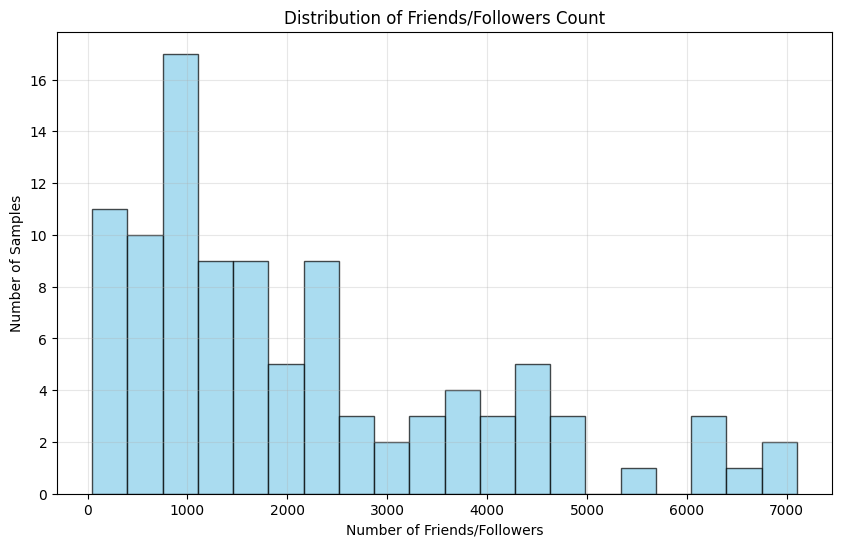

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Number of Friends/Followers'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Number of Friends/Followers')
plt.ylabel('Number of Samples')
plt.title('Distribution of Friends/Followers Count')
plt.grid(True, alpha=0.3)
plt.show()

Remove the name column using `drop()` method

In [7]:
df_clean = df.drop('Name', axis=1)
print("\nDataset after removing Name column:")
print(df_clean.head())


Dataset after removing Name column:
   Posts/Share Frequently?  Active?  Replies to comments/messages?  \
0                        0        1                              1   
1                        1        1                              1   
2                        1        1                              1   
3                        1        1                              0   
4                        1        1                              1   

   Number of Friends/Followers  Personality  
0                         1221            0  
1                          928            0  
2                         6300            1  
3                         2300            0  
4                         1300            1  


## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [8]:
X = df_clean.drop('Personality', axis=1).values
print(f"\nFeatures shape: {X.shape}")


Features shape: (100, 4)


Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [9]:
y = df_clean['Personality'].values
print(f"Labels shape: {y.shape}")

Labels shape: (100,)


Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Display the dimensions of each variables using `.shape()`

In [11]:
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (80, 4)
X_test shape: (20, 4)
y_train shape: (80,)
y_test shape: (20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

Train the model using the `.fit()`

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Test the model using the `.predict()`

In [14]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[0 8]
 [4 8]]


Display the accuracy

<Figure size 800x600 with 0 Axes>

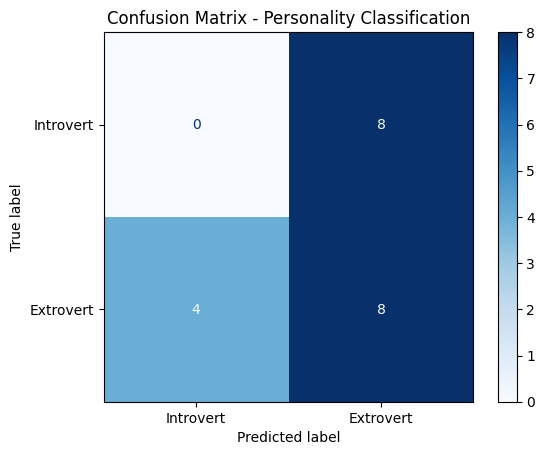

In [16]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Introvert', 'Extrovert'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Personality Classification')
plt.show()

Display the precision

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


Accuracy: 0.4000 (40.00%)


Display the recall

In [18]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.6667


Display the f1-score

In [19]:
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")


F1-Score: 0.5714


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

## Example 1: Someone who posts frequently, is active, replies often, and has many followers

In [20]:
my_features_1 = [[1, 1, 1, 3000]]  # Likely extrovert
prediction_1 = knn.predict(my_features_1)
personality_1 = 'Extrovert' if prediction_1[0] == 1 else 'Introvert'
print(f"\nPrediction for Profile 1 (posts: 1, active: 1, replies: 1, followers: 3000): {personality_1}")


Prediction for Profile 1 (posts: 1, active: 1, replies: 1, followers: 3000): Introvert


## Example 2: Someone who rarely posts, is less active, doesn't reply much, and has few followers

In [21]:
my_features_2 = [[0, 0, 0, 200]]  # Likely introvert
prediction_2 = knn.predict(my_features_2)
personality_2 = 'Extrovert' if prediction_2[0] == 1 else 'Introvert'
print(f"Prediction for Profile 2 (posts: 0, active: 0, replies: 0, followers: 200): {personality_2}")

Prediction for Profile 2 (posts: 0, active: 0, replies: 0, followers: 200): Extrovert


## Example 3: Mixed profile

In [22]:
my_features_3 = [[1, 0, 1, 1500]]  # Could go either way
prediction_3 = knn.predict(my_features_3)
personality_3 = 'Extrovert' if prediction_3[0] == 1 else 'Introvert'
print(f"Prediction for Profile 3 (posts: 1, active: 0, replies: 1, followers: 1500): {personality_3}")

Prediction for Profile 3 (posts: 1, active: 0, replies: 1, followers: 1500): Extrovert


## Additional analysis: Test different k values

In [23]:
print("\n" + "="*50)
print("BONUS: Testing different k values")
print("="*50)

k_values = [1, 3, 5, 7, 9, 11, 15, 21]
accuracies = []

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_pred_k = knn_k.predict(X_test)
    accuracy_k = accuracy_score(y_test, y_pred_k)
    accuracies.append(accuracy_k)
    print(f"k={k}: Accuracy = {accuracy_k:.4f}")


BONUS: Testing different k values
k=1: Accuracy = 0.4500
k=3: Accuracy = 0.5500
k=5: Accuracy = 0.4000
k=7: Accuracy = 0.4500
k=9: Accuracy = 0.4000
k=11: Accuracy = 0.4500
k=15: Accuracy = 0.5000
k=21: Accuracy = 0.5000


## Plot k vs accuracy

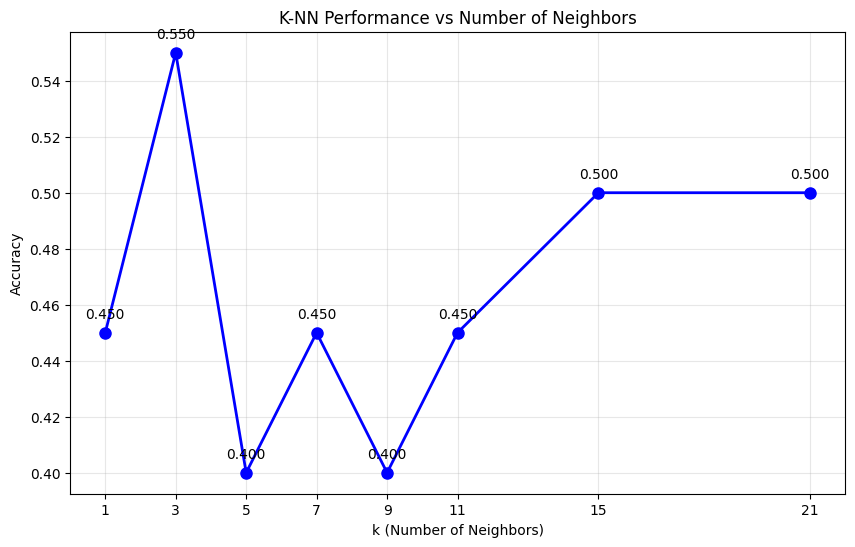

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('K-NN Performance vs Number of Neighbors')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
for i, acc in enumerate(accuracies):
    plt.annotate(f'{acc:.3f}', (k_values[i], acc), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

## Find best k

In [25]:
import numpy as np

best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nBest k value: {best_k} with accuracy: {best_accuracy:.4f}")


Best k value: 3 with accuracy: 0.5500


## Feature importance analysis

In [26]:
print("\n" + "="*50)
print("FEATURE ANALYSIS")
print("="*50)

feature_names = ['Posts/Share Frequently?', 'Active?', 'Replies to comments/messages?', 'Number of Friends/Followers']



FEATURE ANALYSIS


## Calculate feature statistics for each personality type

In [27]:
df_features = pd.DataFrame(X, columns=feature_names)
df_features['Personality'] = y

print("Average values by personality type:")
print(df_features.groupby('Personality').mean())

print("\nFeature correlation with personality:")
for i, feature in enumerate(feature_names):
    correlation = np.corrcoef(X[:, i], y)[0, 1]
    print(f"{feature}: {correlation:.4f}")

Average values by personality type:
             Posts/Share Frequently?   Active?  Replies to comments/messages?  \
Personality                                                                     
0                           0.317073  0.756098                       0.512195   
1                           0.576271  0.830508                       0.542373   

             Number of Friends/Followers  
Personality                               
0                            1802.707317  
1                            2378.389831  

Feature correlation with personality:
Posts/Share Frequently?: 0.2554
Active?: 0.0915
Replies to comments/messages?: 0.0297
Number of Friends/Followers: 0.1613


## Summary

In [28]:
print("\n" + "="*50)
print("SUMMARY")
print("="*50)
print(f"✅ Dataset loaded successfully with {len(df)} samples")
print(f"✅ Model trained with {len(X_train)} training samples")
print(f"✅ Model tested with {len(X_test)} test samples")
print(f"✅ Final accuracy: {accuracy:.2%}")
print(f"✅ Best k value found: {best_k}")
print("✅ Personality predictions completed!")

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("\nModel Performance Summary:")
print(f"• Accuracy:  {accuracy:.4f}")
print(f"• Precision: {precision:.4f}")
print(f"• Recall:    {recall:.4f}")
print(f"• F1-Score:  {f1:.4f}")


SUMMARY
✅ Dataset loaded successfully with 100 samples
✅ Model trained with 80 training samples
✅ Model tested with 20 test samples
✅ Final accuracy: 40.00%
✅ Best k value found: 3
✅ Personality predictions completed!

Model Performance Summary:
• Accuracy:  0.4000
• Precision: 0.5000
• Recall:    0.6667
• F1-Score:  0.5714
